In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Análise - ENEM 2022 e 2020

## **Analisando os datasets**

(ênfase inicial no de 2020, haja vista que o de 2022 já fora analisado a priori na pasta analysis_2022)

In [2]:
df_2022 = pd.read_csv('../../data/enem_2022_v2.csv', low_memory=False, encoding="ISO-8859-1")

In [3]:
df_2020 = pd.read_csv('../../data/enem_2020.csv', low_memory=False, encoding="ISO-8859-1")

In [4]:
df_2020.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783109 entries, 0 to 5783108
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_ANO                  int64  
 1   TP_FAIXA_ETARIA         int64  
 2   TP_SEXO                 object 
 3   TP_ESTADO_CIVIL         int64  
 4   TP_COR_RACA             int64  
 5   TP_NACIONALIDADE        int64  
 6   TP_ST_CONCLUSAO         int64  
 7   TP_ANO_CONCLUIU         int64  
 8   TP_ESCOLA               int64  
 9   IN_TREINEIRO            int64  
 10  NO_MUNICIPIO_ESC        object 
 11  SG_UF_ESC               object 
 12  TP_DEPENDENCIA_ADM_ESC  float64
 13  TP_LOCALIZACAO_ESC      float64
 14  TP_PRESENCA_CN          int64  
 15  TP_PRESENCA_CH          int64  
 16  TP_PRESENCA_LC          int64  
 17  TP_PRESENCA_MT          int64  
 18  NU_NOTA_CN              float64
 19  NU_NOTA_CH              float64
 20  NU_NOTA_LC              float64
 21  NU_NOTA_MT              float64

In [5]:
df_2020.describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005
count,5783109.0,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,904569.000000,904569.000000,5.783109e+06,5.783109e+06,5.783109e+06,5.783109e+06,2.597440e+06,2.754140e+06,2.754140e+06,2.597440e+06,2.754140e+06,2.754140e+06,5.687143e+06
mean,2020.0,6.400507e+00,1.095643e+00,2.146922e+00,1.031476e+00,1.452596e+00,3.316860e+00,1.276176e+00,9.638847e-02,2.441257,1.034515,4.496357e-01,4.777531e-01,4.777531e-01,4.496357e-01,4.904098e+02,5.111522e+02,5.238009e+02,5.205783e+02,1.113882e+00,5.734127e+02,3.711457e+00
std,0.0,4.165703e+00,4.819935e-01,1.012238e+00,2.088103e-01,6.909719e-01,4.538629e+00,5.191631e-01,2.951233e-01,0.912757,0.182547,4.979524e-01,5.010185e-01,5.010185e-01,4.979524e-01,7.999999e+01,9.622299e+01,7.454600e+01,1.173055e+02,7.300496e-01,1.998202e+02,1.474033e+00
min,2020.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2020.0,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.270000e+02,4.353000e+02,4.780000e+02,4.258000e+02,1.000000e+00,4.600000e+02,3.000000e+00
50%,2020.0,5.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.837000e+02,5.125000e+02,5.299000e+02,5.051000e+02,1.000000e+00,5.800000e+02,4.000000e+00
75%,2020.0,1.100000e+01,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,3.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.487000e+02,5.806000e+02,5.764000e+02,6.023000e+02,1.000000e+00,7.000000e+02,4.000000e+00
max,2020.0,2.000000e+01,4.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,1.400000e+01,3.000000e+00,1.000000e+00,4.000000,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,8.548000e+02,8.626000e+02,8.011000e+02,9.750000e+02,9.000000e+00,1.000000e+03,2.000000e+01


In [6]:
df_2020.head()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q010,Q022,Q024,Q025
0,2020,11,F,1,2,1,1,11,1,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,11,M,2,3,1,1,11,1,0,NaN,NaN,NaN,NaN,1,1,1,1,604.1,661.7,595.3,711.3,1.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,4,F,2,3,2,2,0,2,0,Salvador,BA,2.0,1.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.0,B,B,A,A,A,A
3,2020,2,M,1,3,1,2,0,2,0,Santana de ParnaÃ­ba,SP,3.0,1.0,1,1,1,1,620.8,675.0,624.2,759.4,1.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,4,F,1,3,2,1,1,1,0,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.0,B,B,A,B,A,B


In [7]:
df_2020.tail()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q008,Q010,Q022,Q024,Q025
5783104,2020,2,F,1,1,1,2,0,2,0,CrateÃºs,CE,2.0,1.0,1,1,1,1,508.3,661.4,658.3,725.7,1.0,900.0,E,G,A,D,5.0,G,C,B,D,B,B
5783105,2020,3,M,1,1,1,2,0,2,0,TrÃªs Lagoas,MS,1.0,1.0,1,1,1,1,570.5,646.1,607.2,719.5,1.0,660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5783106,2020,3,F,1,1,1,1,1,1,0,NaN,NaN,NaN,NaN,1,1,1,1,418.8,597.5,674.5,648.1,1.0,660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5783107,2020,4,F,1,1,1,2,0,3,0,CuiabÃ¡,MT,4.0,1.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,G,G,E,E,5.0,N,D,C,E,D,B
5783108,2020,2,F,1,3,1,2,0,2,0,SÃ£o LuÃ­s,MA,2.0,1.0,1,1,1,1,478.5,625.5,538.4,481.7,1.0,380.0,F,D,D,B,5.0,C,B,B,D,A,B


Comparando se ambos os datasets possuem as mesmas colunas

In [8]:
df_2022.columns

Index(['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q008', 'Q010', 'Q022', 'Q024', 'Q025'],
      dtype='object')

In [9]:
df_2020.columns

Index(['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q008', 'Q010', 'Q022', 'Q024', 'Q025'],
      dtype='object')

## **Análise da coluna Q006**

*Dicionário - Base de dados do governo:*

Q006 - Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares)

A - Nenhuma Renda

B - Até R$ 1.212,00

C - De R$ 1.212,01 até R$ 1.818,00.

D - De R$ 1.818,01 até R$ 2.424,00.

E - De R$ 2.424,01 até R$ 3.030,00.

F - De R$ 3.030,01 até R$ 3.636,00.

G - De R$ 3.636,01 até R$ 4.848,00.

H - De R$ 4.848,01 até R$ 6.060,00.

I - De R$ 6.060,01 até R$ 7.272,00.

J - De R$ 7.272,01 até R$ 8.484,00

K - De R$ 8.484,01 até R$ 9.696,00.

L - De R$ 9.696,01 até R$ 10.908,00.

M - De R$ 10.908,01 até R$ 12.120,00.

N - De R$ 12.120,01 até R$ 14.544,00.

O - De R$ 14.544,01 até R$ 18.180,00.

P - De R$ 18.180,01 até R$ 24.240,00.

Q - Acima de R$ 24.240,00.

### **Alteração dos dados**

Alteração dos dados para redução do dicionário.

De acordo com definição de classes do IBGE:

Classe A - Acima de 20 salários mínimos - 24.240,01 ou mais 
-- corresponde a: (Q)

Classe B - De 10 a 20 salários mínimos - 12.120,01 a 22.240,00
-- corresponde a: (N, O, P)

Classe C - De 4 a 10 salários mínimos - 4.848,01 a 12.120,00 
-- corresponde a: (G, H, I, J, K, L, M)

Classe D - De 2 a 4 salários mínimos - 2.424,01 a 4.848,00 
-- corresponde a: (E, F)

Classe E - Até 2 salários mínimos - Até 2.424,00 
-- corresponde a: (A, B, C, D)

In [14]:
df_2022['Q006'].value_counts().sort_index()

Q006
A     204475
B    1022869
C     584278
D     414266
E     276704
F     158091
G     194319
H     188751
I      78916
J      54984
K      38997
L      51295
M      48530
N      34824
O      39034
P      36032
Q      49740
Name: count, dtype: int64

In [13]:
df_2020['Q006'].value_counts().sort_index()

Q006
A     459211
B    1884219
C    1039889
D     723147
E     339346
F     355481
G     252580
H     171316
I      98901
J      58292
K      45556
L      34385
M      47107
N      45106
O      41067
P      40445
Q      51095
Name: count, dtype: int64

In [15]:
df_2022['CLASSES'] = df_2022['Q006'].apply(lambda x: 'A' if x == 'Q' 
                                 else 'B' if x == 'N' or x == 'O' or x == 'P' 
                                 else 'C' if x == 'G' or x == 'H' or x == 'I' or x == 'J' or x == 'K' or x == 'L' or x == 'M'
                                 else 'D' if x == 'E' or x == 'F'
                                 else 'E')

In [16]:
df_2020['CLASSES'] = df_2020['Q006'].apply(lambda x: 'A' if x == 'Q' 
                                 else 'B' if x == 'N' or x == 'O' or x == 'P' 
                                 else 'C' if x == 'G' or x == 'H' or x == 'I' or x == 'J' or x == 'K' or x == 'L' or x == 'M'
                                 else 'D' if x == 'E' or x == 'F'
                                 else 'E')

### Estatísticas dos dados

In [19]:
df_2022["MEDIA_GERAL"] = df_2022[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

df_2022[["MEDIA_GERAL", "CLASSES"]].groupby("CLASSES").describe()

MEDIA_GERAL                                                      \
              count        mean        std  min     25%     50%     75%   
CLASSES                                                                   
A           41825.0  635.314355  82.662278  0.0  586.86  642.64  692.58   
B           94389.0  625.273200  82.221005  0.0  575.40  631.00  681.78   
C          536801.0  587.862714  84.970835  0.0  534.38  590.50  645.70   
D          328327.0  553.810486  83.482194  0.0  502.86  554.78  608.30   
E         1502672.0  510.145703  83.224113  0.0  461.06  511.04  563.04   

                 
            max  
CLASSES          
A        855.98  
B        855.82  
C        843.50  
D        836.10  
E        833.52

In [20]:
df_2020["MEDIA_GERAL"] = df_2020[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

df_2020[["MEDIA_GERAL", "CLASSES"]].groupby("CLASSES").describe()

MEDIA_GERAL                                                       \
              count        mean        std  min     25%     50%      75%   
CLASSES                                                                    
A           33351.0  640.493188  88.365488  0.0  587.41  648.70  703.420   
B           87880.0  626.771200  87.710971  0.0  571.50  633.92  689.420   
C          454652.0  585.133776  90.424442  0.0  522.88  587.04  649.760   
D          364572.0  544.367552  87.183397  0.0  484.12  541.34  602.705   
E         1822444.0  495.783816  81.792773  0.0  441.48  489.44  546.120   

                 
            max  
CLASSES          
A        852.76  
B        852.86  
C        858.58  
D        847.82  
E        837.72

## Gráficos

In [21]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

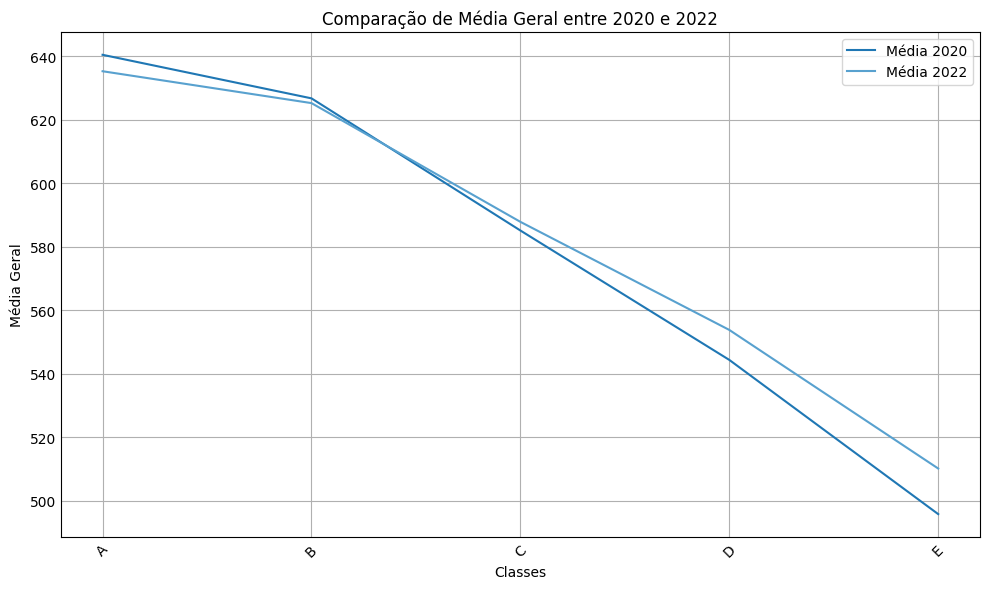

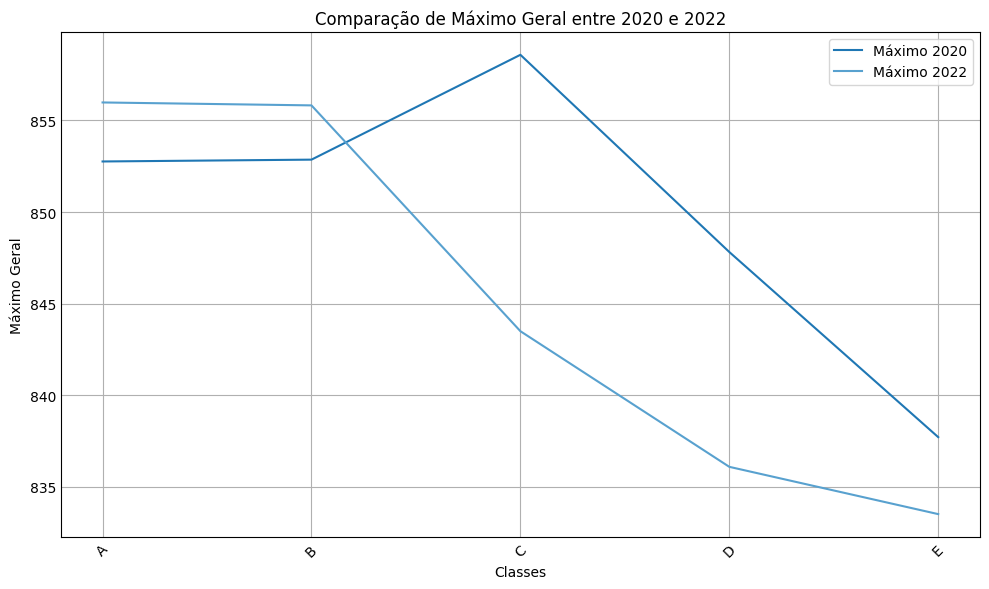

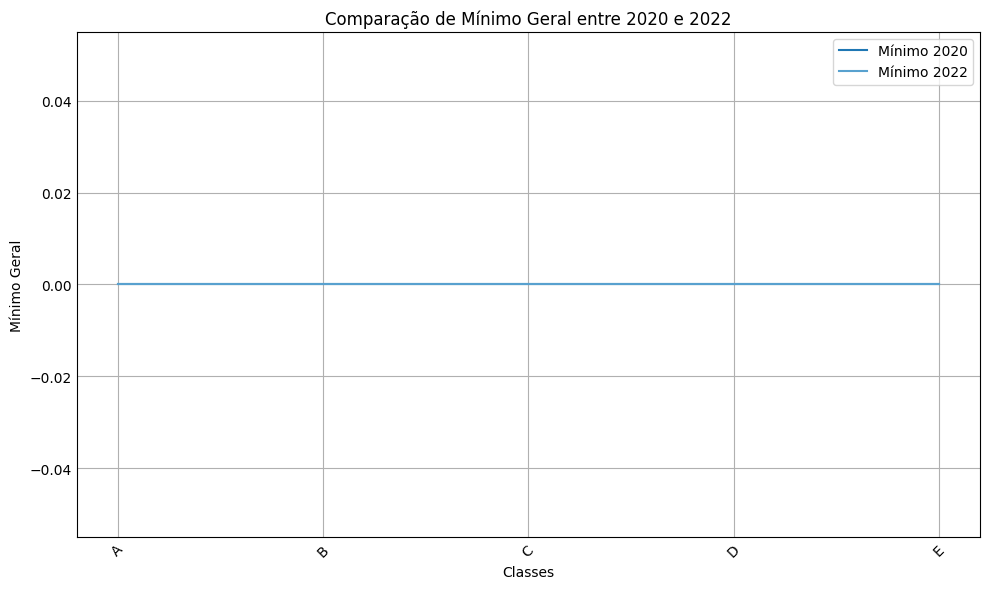

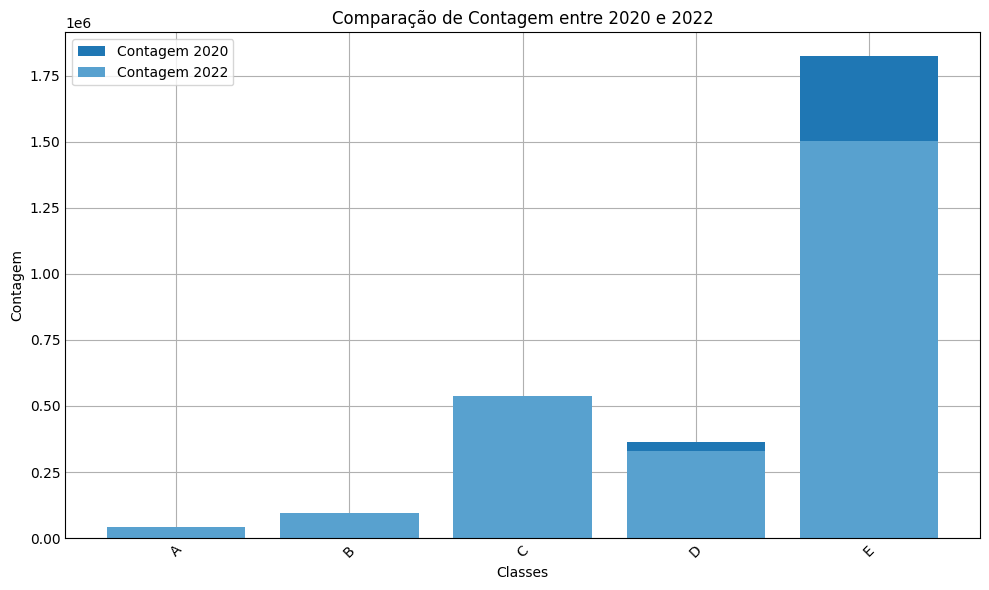

In [22]:
# Gráficos de comparação de média
df_2020_mean = df_2020[["MEDIA_GERAL", "CLASSES"]].groupby("CLASSES").mean()
df_2022_mean = df_2022[["MEDIA_GERAL", "CLASSES"]].groupby("CLASSES").mean()

plt.figure(figsize=(10, 6))
plt.plot(df_2020_mean.index, df_2020_mean["MEDIA_GERAL"], label="Média 2020")
plt.plot(df_2022_mean.index, df_2022_mean["MEDIA_GERAL"], label="Média 2022")
plt.xlabel("Classes")
plt.ylabel("Média Geral")
plt.title("Comparação de Média Geral entre 2020 e 2022")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráficos de comparação de máximo
df_2020_max = df_2020[["MEDIA_GERAL", "CLASSES"]].groupby("CLASSES").max()
df_2022_max = df_2022[["MEDIA_GERAL", "CLASSES"]].groupby("CLASSES").max()

plt.figure(figsize=(10, 6))
plt.plot(df_2020_max.index, df_2020_max["MEDIA_GERAL"], label="Máximo 2020")
plt.plot(df_2022_max.index, df_2022_max["MEDIA_GERAL"], label="Máximo 2022")
plt.xlabel("Classes")
plt.ylabel("Máximo Geral")
plt.title("Comparação de Máximo Geral entre 2020 e 2022")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráficos de comparação de mínimo
df_2020_min = df_2020[["MEDIA_GERAL", "CLASSES"]].groupby("CLASSES").min()
df_2022_min = df_2022[["MEDIA_GERAL", "CLASSES"]].groupby("CLASSES").min()

plt.figure(figsize=(10, 6))
plt.plot(df_2020_min.index, df_2020_min["MEDIA_GERAL"], label="Mínimo 2020")
plt.plot(df_2022_min.index, df_2022_min["MEDIA_GERAL"], label="Mínimo 2022")
plt.xlabel("Classes")
plt.ylabel("Mínimo Geral")
plt.title("Comparação de Mínimo Geral entre 2020 e 2022")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráficos de comparação de contagem
df_2020_count = df_2020[["MEDIA_GERAL", "CLASSES"]].groupby("CLASSES").count()
df_2022_count = df_2022[["MEDIA_GERAL", "CLASSES"]].groupby("CLASSES").count()

plt.figure(figsize=(10, 6))
plt.bar(df_2020_count.index, df_2020_count["MEDIA_GERAL"], label="Contagem 2020")
plt.bar(df_2022_count.index, df_2022_count["MEDIA_GERAL"], label="Contagem 2022")
plt.xlabel("Classes")
plt.ylabel("Contagem")
plt.title("Comparação de Contagem entre 2020 e 2022")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
